In [77]:
import pandas as pd
import numpy as np
import pickle

In [78]:
#path = "../../Data/Team1_/05Stage/Metrics/Raw/Individual/IndividualnetworkMetrics.pkl"
#path = "../../Data/Team1_/05Stage/Metrics/Normalized/Individual/normalizateIndividualnetworkMetrics.pkl"
path = "../../Data/Team1_/05Stage/Metrics/Classified/Individual/classifiedIndividualnetworkMetrics.pkl"


In [79]:
def load_metrics(file):
    try:
        with open(file, "rb") as f:
            deserializedFile = pickle.load(f)
        return deserializedFile
    except FileNotFoundError:
        print(f"File  not found.")


In [80]:
def load_scores(scores):
    try:
        # Open the CSV file
        # Create a CSV reader object
        dfScore = pd.read_csv(scores)
        return dfScore
    except FileNotFoundError:
        print("The file does not exist.")
    except Exception as e:
        print("An error occurred:", e)

In [81]:
file = load_metrics(path)

In [82]:
#print(file.columns)

In [83]:
#headers = set(header[0] for header in file.columns)
#headers

In [84]:
file

{'inD': {'0_1': {'6616': [0.4, 0.38, 2, 'bad'],
   '5503': [0.39, 0.26, 5, 'bad'],
   '5203': [0.64, 0.31, 8, 'medium'],
   '6379': [0.57, 0.21, 7, 'medium'],
   '5506': [0.55, 0.23, 7, 'medium'],
   '4691': [0.12, 0.17, 7, 'worst'],
   '4324': [0.33, 0.21, 5, 'bad'],
   '4320': [0.63, 0.34, 8, 'medium'],
   '5213': [0.58, 0.35, 8, 'medium'],
   '11094': [0.35, 0.03, 2, 'bad'],
   '6998': [0.46, 0.29, 2, 'bad'],
   '5470': [0.53, 0.21, 6, 'medium'],
   '5211': [0.6, 0.31, 7, 'medium'],
   '5216': [0.56, 0.43, 4, 'medium'],
   '5246': [0.65, 0.26, 8, 'good'],
   '20055': [0.31, 0.44, 2, 'bad'],
   '6332': [1.0, nan, 1, 'excellent'],
   '10609': [0.37, 0.21, 5, 'bad'],
   '3508': [0.72, 0.39, 2, 'good'],
   '7068': [0.62, nan, 1, 'medium'],
   '6400': [0.88, nan, 1, 'excellent']},
  '0_2': {'5246': [0.5, 0.17, 3, 'medium'],
   '5503': [1.0, nan, 1, 'excellent'],
   '6379': [0.31, 0.34, 3, 'bad'],
   '5213': [0.54, 0.12, 3, 'medium'],
   '5506': [0.71, 0.06, 2, 'good'],
   '5211': [0.47, 

In [85]:
headers = set(header[0] for header in file.columns)
    
for header in headers:
    classifyValues = pd.cut(
        np.array(file[(f"{header}", "Mean")]),
        5,
        labels=["wortst","bad", "medium", "good", "excellent"],
        duplicates='drop'  # Set duplicates to 'drop'
    ).astype(str)
    columnClassifiy = pd.DataFrame({'Class': classifyValues}, index=file[(f"{header}", "Mean")].index)
    print(columnClassifiy)

AttributeError: 'dict' object has no attribute 'columns'

In [ ]:
max_value = file[('inD', 'Count')].max()
print(max_value)
# Step 2: Calculate the threshold (1/4 of the maximum value)
threshold = max_value / 4
print(threshold)
# Step 3: Filter the DataFrame
filtered_df = file[file[('inD', 'Count')] >= threshold]

print("\nFiltered DataFrame:\n", filtered_df)

18
4.5

Filtered DataFrame:
       inD                         outD                        clust        \
     Mean   Std Count      Class  Mean   Std Count      Class  Mean   Std   
0_1  0.33  0.21     5        bad  0.41  0.27     5        bad  0.10  0.23   
1_0  0.58  0.29    18  excellent  0.73  0.18    18  excellent  0.53  0.35   
2_0  0.65  0.34    14  excellent  0.59  0.27    14       good  0.58  0.24   
3_0  0.58  0.39    10       good  0.60  0.29    10  excellent  0.41  0.28   
4_0  0.44  0.31     8     medium  0.53  0.35     8  excellent  0.56  0.41   
1_1  0.40  0.32     7        bad  0.46  0.34     7     medium  0.50  0.31   
2_1  0.49  0.39     7       good  0.52  0.30     7     medium  0.50  0.34   

     ...  clos            eigenv                         ecce              \
     ... Count      Class   Mean   Std Count      Class  Mean   Std Count   
0_1  ...     5        bad   0.69  0.27     4       good  0.25  0.29     4   
1_0  ...    18  excellent   0.65  0.30    17  

In [ ]:
a = pd.cut(np.array(file[("inD", "Mean")]), 5,
       labels=["worst", "bad", "medium", "good", "excellent"])

b = pd.cut(np.array(file[("outD", "Mean")]), 5, labels=["worst", "bad", "medium", "good", "excellent"])

In [ ]:
print(a)
print("")
print(b)

['bad', 'bad', 'good', 'medium', 'good', ..., 'worst', 'worst', 'worst', 'medium', 'worst']
Length: 22
Categories (5, object): ['worst' < 'bad' < 'medium' < 'good' < 'excellent']

['medium', 'worst', 'good', 'excellent', 'good', ..., 'worst', 'bad', 'worst', 'medium', 'worst']
Length: 22
Categories (5, object): ['worst' < 'bad' < 'medium' < 'good' < 'excellent']


GRÀFICS

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
categories = ['excellent', 'good', 'medium', 'bad', 'worst']
cat_type = pd.CategoricalDtype(categories=categories, ordered=True)
file[('inD', 'Class')] = file[('inD', 'Class')].astype(cat_type)

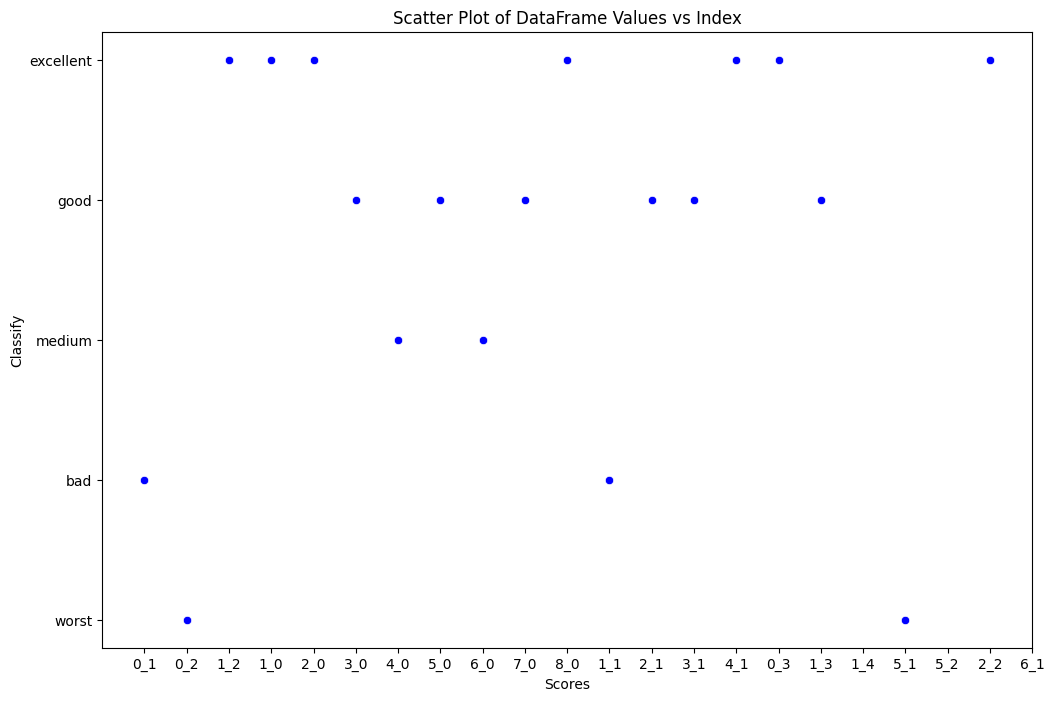

In [ ]:
plt.figure(figsize=(12,8 ))
sns.scatterplot(x=file.index, y=file[("inD","Class")], color='blue')

# Adding titles and labels
plt.title('Scatter Plot of DataFrame Values vs Index')
plt.xlabel('Scores')
plt.ylabel('Classify')

# Displaying the plot
plt.grid(False)
plt.show()